In [1]:
import pandas as pd
df = pd.read_csv('philly.csv')

In [2]:
df.drop(df.index[8344:9592],axis = 0, inplace = True)

In [3]:
df.head()

,raw_row_number,date,time,location,district,service_area,subject_age,subject_race,subject_sex,type,arrest_made,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,411981,1/1/2014,1:14:00,NaN,19.0,191,31.0,black,male,pedestrian,True,True,False,True,True,False,Black - Non-Latino,True,False
1,407442,1/1/2014,1:57:00,NaN,12.0,121,21.0,black,male,pedestrian,True,False,True,True,True,False,Black - Non-Latino,False,False
2,217556,1/1/2014,3:30:00,3400 BLOCK SPRUCE ST,18.0,183,24.0,black,male,pedestrian,False,NaN,False,False,False,False,Black - Non-Latino,False,False
3,217557,1/1/2014,3:40:00,3400 BLOCK SPRUCE ST,18.0,183,20.0,black,male,pedestrian,False,NaN,False,False,False,False,Black - Non-Latino,False,False
4,230988,1/1/2014,8:30:00,N 56TH ST / UPLAND WAY,19.0,193,31.0,black,male,vehicular,False,NaN,False,False,False,False,Black - Non-Latino,False,False


In [4]:
df.isna().sum()

raw_row_number                  0
date                            0
time                            0
location                      445
district                        0
service_area                    0
subject_age                    63
subject_race                    0
subject_sex                     0
type                            0
arrest_made                     0
contraband_found             7795
frisk_performed                 0
search_conducted                0
search_person                   0
search_vehicle                  0
raw_race                        0
raw_individual_contraband       0
raw_vehicle_contraband          0
dtype: int64

In [5]:
df = df.dropna(subset = ['location'])

In [6]:
df.drop(['contraband_found','raw_row_number'], axis =1, inplace = True)

In [7]:
df.reset_index(drop = True, inplace = True)

In [9]:
df['subject_race'].value_counts()

black                     5501
white                     1497
hispanic                   681
asian/pacific islander     165
unknown                     29
other                       26
Name: subject_race, dtype: int64

In [10]:
df['arrest_made'].value_counts()

False    7439
True      460
Name: arrest_made, dtype: int64

In [11]:
df['frisk_performed'].value_counts()

False    6834
True     1065
Name: frisk_performed, dtype: int64

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
age_plot = df['subject_age'].value_counts(ascending = True)

<AxesSubplot:>

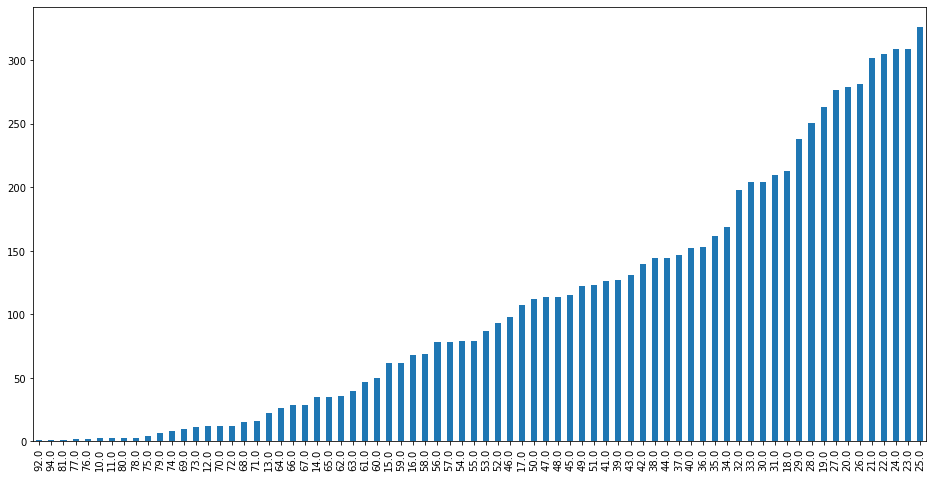

In [140]:
age_plot.plot(kind = 'bar', figsize = (16,8))

In [16]:
df['location'].value_counts()

OLD YORK RD / W ROOSEVELT BLVD RAMP B    32
5900 BLOCK MARKET ST                     25
3200 BLOCK N BROAD ST                    24
15000 BLOCK E ROOSEVELT BLVD             23
5900 BLOCK E ROOSEVELT BLVD              22
                                         ..
900 BLOCK W BUTLER ST                     1
5800 STREET/BALTIMORE AV                  1
2700 BLOCK S FRONT ST                     1
1200 BLOCK S PEACH ST                     1
N 10TH ST / W LYCOMING ST                 1
Name: location, Length: 4647, dtype: int64

In [17]:
df = df.astype({'frisk_performed':'int32',
                'search_conducted':'int32',
                'search_person':'int32',
                'arrest_made':'int32',
                'search_vehicle':'int32',
                'subject_sex':'category',
               'district':'category',
               'service_area':'category',
               'subject_race':'category',
               'type':'category',
               'raw_race':'category'})

In [18]:
df.dtypes

date                           object
time                           object
location                       object
district                     category
service_area                 category
subject_age                   float64
subject_race                 category
subject_sex                  category
type                         category
arrest_made                     int32
frisk_performed                 int32
search_conducted                int32
search_person                   int32
search_vehicle                  int32
raw_race                     category
raw_individual_contraband      object
raw_vehicle_contraband         object
dtype: object

In [19]:
df['subject_age'].fillna(method='ffill', inplace = True)

In [22]:
male = df[df.subject_sex == 'male']

In [23]:
female = df[df.subject_sex == 'female']

In [72]:
female.arrest_made.value_counts(normalize = True)

0    0.967761
1    0.032239
Name: arrest_made, dtype: float64

In [70]:
male.arrest_made.value_counts(normalize = True)

0    0.934769
1    0.065231
Name: arrest_made, dtype: float64

In [141]:
male_frisk = male.frisk_performed.value_counts(normalize = True)

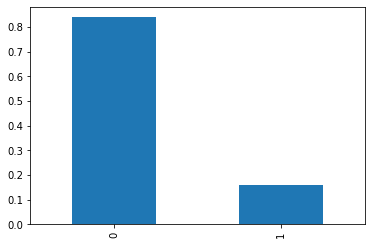

In [142]:
male_frisk.plot(kind = 'bar')
plt.show()

In [143]:
female_frisk = female.frisk_performed.value_counts(normalize = True)

<AxesSubplot:>

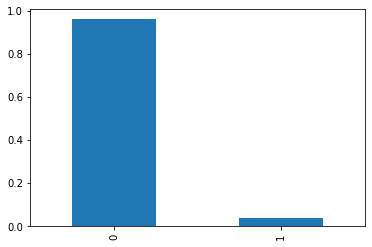

In [144]:
female_frisk.plot(kind = 'bar')

In [24]:
df.groupby(['subject_sex']).arrest_made.sum()

subject_sex
female     54
male      406
Name: arrest_made, dtype: int32

In [26]:
df.groupby(['subject_sex','subject_race']).arrest_made.sum()

subject_sex  subject_race          
female       asian/pacific islander      0
             black                      42
             hispanic                    4
             other                       0
             unknown                     0
             white                       8
male         asian/pacific islander      3
             black                     296
             hispanic                   49
             other                       1
             unknown                     1
             white                      56
Name: arrest_made, dtype: int32

In [27]:
df.groupby(['subject_sex','subject_race']).frisk_performed.sum()

subject_sex  subject_race          
female       asian/pacific islander      0
             black                      42
             hispanic                    4
             other                       0
             unknown                     1
             white                      17
male         asian/pacific islander      9
             black                     783
             hispanic                   91
             other                       3
             unknown                     1
             white                     114
Name: frisk_performed, dtype: int32

In [28]:
df.subject_race.value_counts()

black                     5501
white                     1497
hispanic                   681
asian/pacific islander     165
unknown                     29
other                       26
Name: subject_race, dtype: int64

In [29]:
df[df.location.str.contains('BLOCK SPRUCE')]

,date,time,location,district,service_area,subject_age,subject_race,subject_sex,type,arrest_made,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,1/1/2014,3:30:00,3400 BLOCK SPRUCE ST,18.0,183,24.0,black,male,pedestrian,0,0,0,0,0,Black - Non-Latino,False,False
1,1/1/2014,3:40:00,3400 BLOCK SPRUCE ST,18.0,183,20.0,black,male,pedestrian,0,0,0,0,0,Black - Non-Latino,False,False
158,1/2/2014,23:30:00,5600 BLOCK SPRUCE ST,18.0,182,34.0,black,male,vehicular,0,1,0,0,0,Black - Non-Latino,False,False
574,1/10/2014,16:40:00,5500 BLOCK SPRUCE ST,18.0,182,22.0,black,male,pedestrian,1,1,1,1,0,Black - Non-Latino,False,False
712,1/12/2014,1:29:00,6000 BLOCK SPRUCE ST,18.0,181,42.0,white,male,pedestrian,0,0,0,0,0,White - Non-Latino,False,False
716,1/12/2014,2:51:00,5300 BLOCK SPRUCE ST,18.0,182,27.0,black,male,pedestrian,0,0,0,0,0,Black - Non-Latino,False,False
2168,1/23/2014,11:25:00,5900 BLOCK SPRUCE ST,18.0,181,23.0,black,male,pedestrian,1,1,0,0,0,Black - Non-Latino,False,False
2312,1/23/2014,22:29:00,5200 BLOCK SPRUCE ST,18.0,182,27.0,black,male,vehicular,0,0,0,0,0,Black - Non-Latino,False,False
2395,1/24/2014,12:31:00,2100 BLOCK SPRUCE ST,9.0,91,38.0,black,female,vehicular,0,0,0,0,0,Black - Non-Latino,False,False
2403,1/24/2014,13:00:00,5400 BLOCK SPRUCE ST,18.0,182,45.0,black,male,pedestrian,1,1,1,1,0,Black - Non-Latino,False,False


In [30]:
df['date'] = df.date.str.replace('/','-')
df['date_time'] = df[['date','time']].agg(' '.join, axis =1)

In [31]:
df['date_time'].head()

0    1-1-2014 3:30:00
1    1-1-2014 3:40:00
2    1-1-2014 8:30:00
3    1-1-2014 8:53:00
4    1-1-2014 9:00:00
Name: date_time, dtype: object

In [32]:
df['date_time'] = pd.to_datetime(df['date_time'],infer_datetime_format=True)

In [36]:
from datetime import date as dt

In [38]:
df.set_index('date_time',inplace = True)

In [41]:
df.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='date_time', length=7899)

In [98]:
import matplotlib.ticker as mtick

In [99]:
daily_arrest = df.groupby(df.index.day).arrest_made.mean()

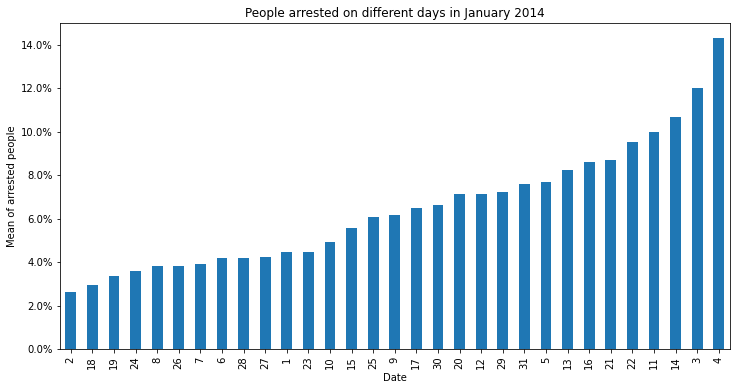

In [135]:
ax = daily_arrest.sort_values().plot(kind = 'bar', figsize = (12,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Date')
plt.ylabel('Mean of arrested people')
plt.title('People arrested on different days in January 2014')
plt.show()

In [43]:
sunday = df[df.index.weekday == 6] #weekday 6 is sunday in datetime module
saturday = df[df.index.weekday == 5]

In [44]:
sunday.arrest_made.sum()

30

In [45]:
saturday.arrest_made.sum()

42

In [46]:
df.arrest_made.sum()

460

In [84]:
male_frisk = df[(df.subject_sex == 'male') & (df.frisk_performed == 1)]

In [103]:
race_frisk = male_frisk.subject_race.value_counts(normalize = True)

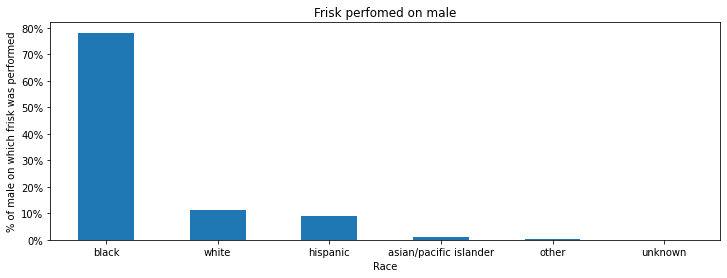

In [118]:
ax1 = race_frisk.plot(kind = 'bar', figsize = (12,4))
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=0)
plt.xlabel('Race')
plt.ylabel('% of male on which frisk was performed')
plt.title('Frisk perfomed on male')
plt.show()

In [121]:
table = pd.crosstab(df.subject_race,
            df.subject_sex)

In [122]:
table

subject_sex,female,male
subject_race,,
asian/pacific islander,33,132
black,1066,4435
hispanic,151,530
other,6,20
unknown,6,23
white,413,1084


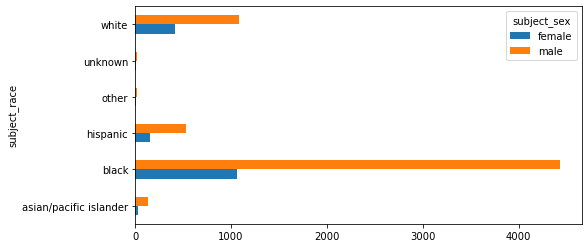

In [136]:
table.plot(kind = 'barh',figsize = (8,4))
plt.show()